In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/Student Depression Dataset.csv')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Checking for Null Values
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
# there are 3 null values in Financial Stress 
# Checking the shape of the dataset
data.shape

(27901, 18)

In [5]:
# there are 27901 rows , so we can remove the 3 null rows 
data.dropna(inplace=True)

In [6]:
# Now the 3 null rows are removed
data.shape

(27898, 18)

In [7]:
# lets check again for null values
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
# checking for any duplicate values
data.duplicated().sum()

np.int64(0)

In [9]:
# only about numerical values
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [10]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [11]:
# describe the object type data
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27898,27898,27898,27898,27898,27898,27898,27898
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15546,1570,27867,8309,10316,6080,17656,14397


<Axes: xlabel='Age'>

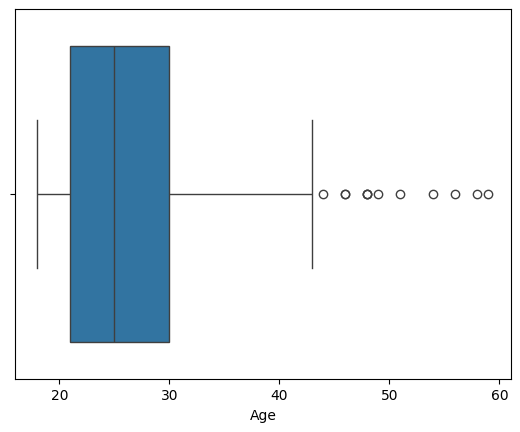

In [12]:
# checking outliers
sns.boxplot(x=data['Age'])

C:\Users\Dunith Munasinghe\AppData\Local\Temp\ipykernel_13464\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

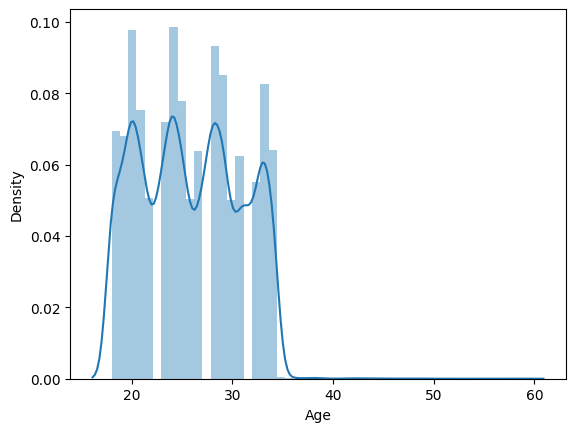

In [13]:
sns.distplot(data['Age'])

In [14]:
# hope to remove outliers using IQR method
# if the values are outside the upper or lower bound we replace that value with the nearest bound value 

def remove_outliers_age(text):
    q1 = data['Age'].quantile(0.25)
    q3 = data['Age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    if text > upper_bound:
        return upper_bound
    elif text < lower_bound:
        return lower_bound
    else:
        return text

In [15]:
data['Age'] = data['Age'].apply(remove_outliers_age)

# EDA

In [16]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [17]:
no_depression = data[data['Depression'] == 0]

In [18]:
depression = data[data['Depression'] == 1]

In [19]:
depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1


In [20]:
# univariable analysis
# counts function or count plot or pie plot for categorical variable
# For the numerical we will use the distplot or histplot

In [21]:
depression['Gender'].value_counts()

Gender
Male      9115
Female    7220
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

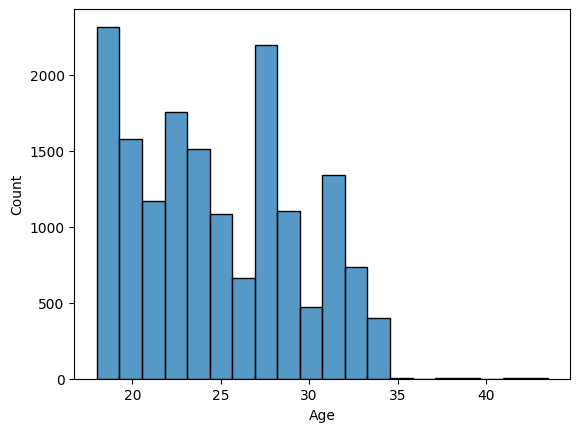

In [22]:
# males are most tend to be depressed than females
sns.histplot(depression['Age'], bins=20)

In [23]:
depression['City'].value_counts()
# after executing the above code we can see that the most depressed city is Kalyan

City
Kalyan           934
Hyderabad        897
Srinagar         763
Vasai-Virar      739
Thane            673
Kolkata          649
Ludhiana         647
Lucknow          641
Ahmedabad        640
Patna            636
Surat            625
Agra             585
Bhopal           579
Visakhapatnam    552
Jaipur           543
Pune             541
Chennai          528
Rajkot           511
Meerut           493
Delhi            468
Bangalore        467
Ghaziabad        428
Vadodara         390
Indore           389
Mumbai           386
Varanasi         363
Nagpur           363
Kanpur           330
Nashik           289
Faridabad        271
Saanvi             2
Bhavna             2
City               1
3.0                1
Mira               1
Harsha             1
Vaanya             1
Gaurav             1
Harsh              1
M.Com              1
Mihir              1
Nalini             1
Khaziabad          1
Name: count, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

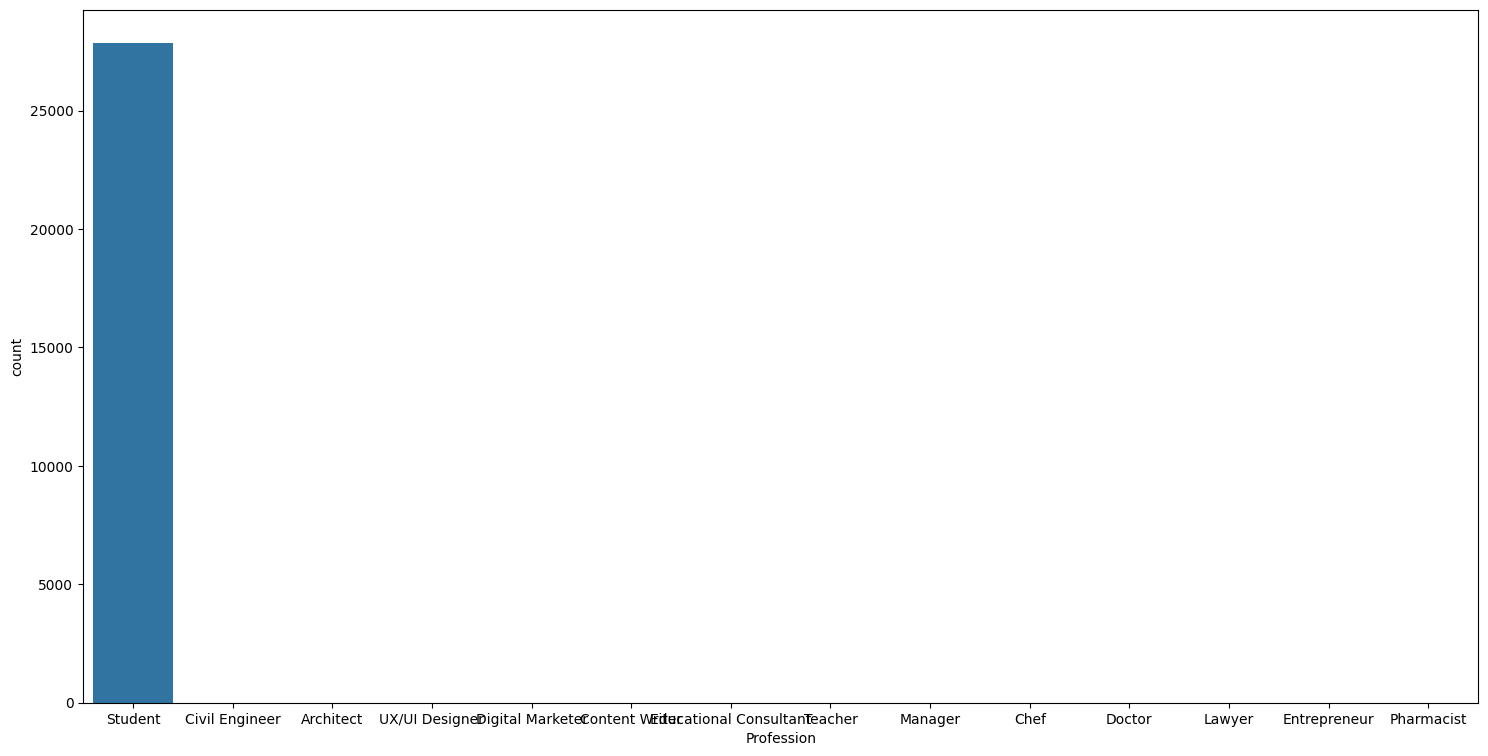

In [24]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['Profession'])

In [25]:
depression['Profession'].value_counts()
# we can clearly see that the most depressed profession is student

Profession
Student                   16307
Architect                     7
Teacher                       5
Content Writer                2
Chef                          2
Digital Marketer              2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [26]:
depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1


<Axes: xlabel='Academic Pressure', ylabel='Count'>

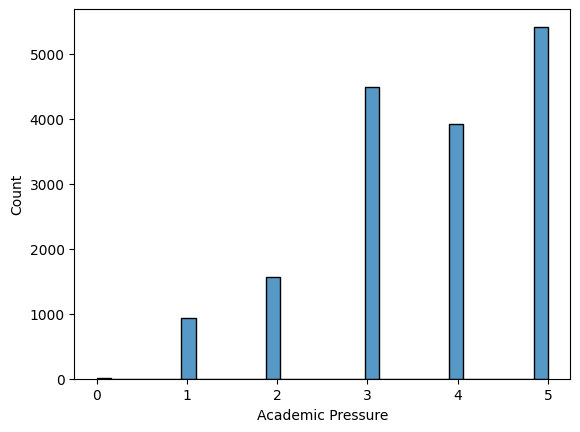

In [27]:
sns.histplot(depression['Academic Pressure'])

<Axes: xlabel='Work/Study Hours', ylabel='Count'>

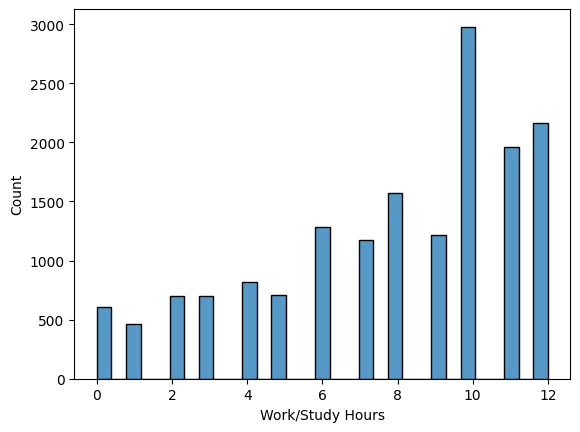

In [28]:
sns.histplot(depression['Work/Study Hours'])

<Axes: xlabel='CGPA', ylabel='Count'>

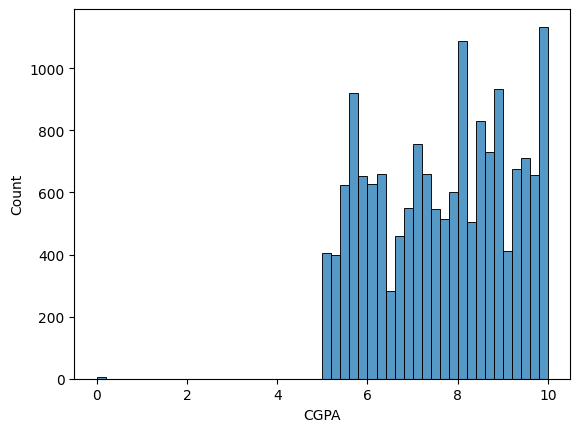

In [29]:
sns.histplot(depression['CGPA'])

<Axes: xlabel='Study Satisfaction', ylabel='Count'>

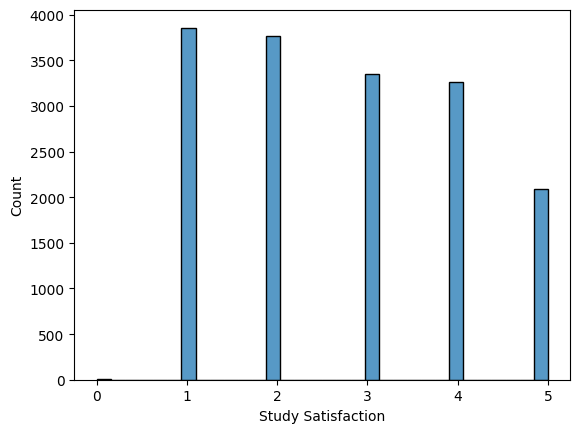

In [30]:
sns.histplot(depression['Study Satisfaction'])
# persons who has higher study satisfaction are less depressed

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

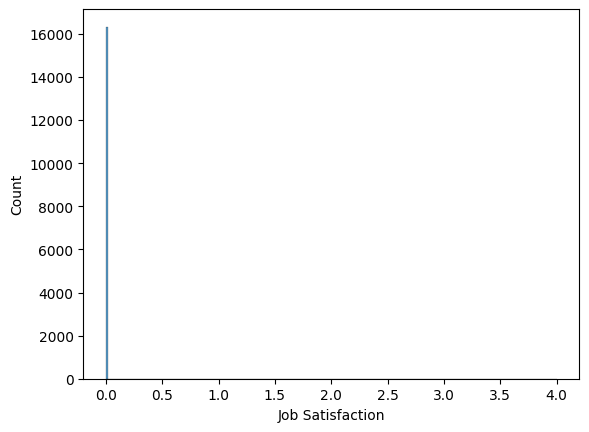

In [31]:
sns.histplot(depression['Job Satisfaction'])
# if the persons who not satisfed with their job they are more depressed

In [32]:
# For Catagorical data ('Sleep Duration')
depression['Sleep Duration'].value_counts()
# for reduce depression you should get a good sleep

Sleep Duration
Less than 5 hours    5361
7-8 hours            4371
5-6 hours            3516
More than 8 hours    3078
Others                  9
Name: count, dtype: int64

In [33]:
depression['Dietary Habits'].value_counts()
# if a person is tend to be healthy they are less depressed

Dietary Habits
Unhealthy    7297
Moderate     5558
Healthy      3472
Others          8
Name: count, dtype: int64

In [34]:
depression['Degree'].value_counts()

Degree
Class 12    4303
B.Ed        1021
B.Arch       871
B.Com        853
BCA          818
MSc          679
B.Tech       655
MCA          559
BSc          523
M.Tech       521
BHM          509
B.Pharm      428
M.Ed         415
BBA          407
MBBS         404
M.Com        390
LLB          356
BE           334
BA           321
M.Pharm      314
MBA          303
MD           298
MA           290
PhD          286
LLM          259
MHM           99
ME            98
Others        21
Name: count, dtype: int64

In [35]:
depression['Have you ever had suicidal thoughts ?'].value_counts()
# almost 90% people tend to have depression who ever had suicidal thoughts

Have you ever had suicidal thoughts ?
Yes    13957
No      2378
Name: count, dtype: int64

<Axes: xlabel='Financial Stress', ylabel='Count'>

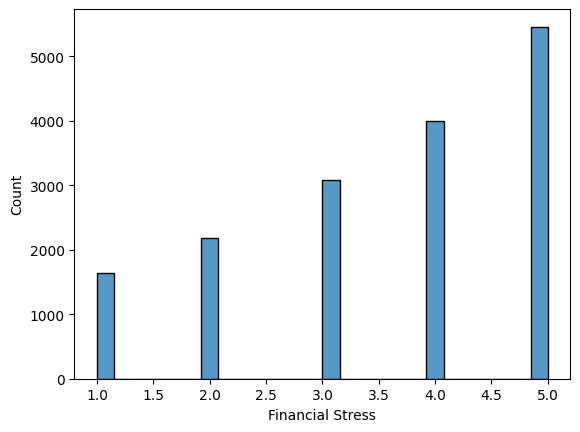

In [36]:
sns.histplot(depression['Financial Stress'])

<Axes: xlabel='Family History of Mental Illness', ylabel='Count'>

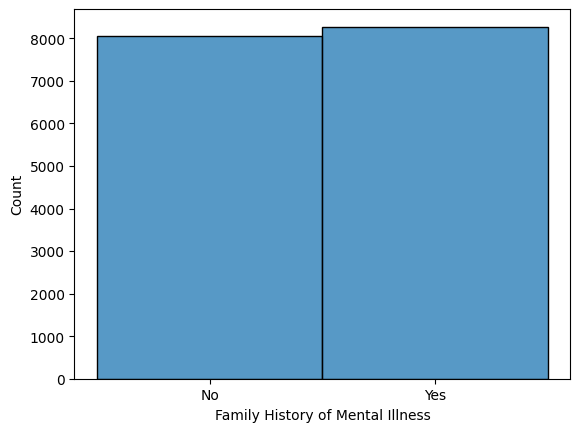

In [37]:
sns.histplot(depression['Family History of Mental Illness'])

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# calling object
lable = LabelEncoder()

In [40]:
categorical_columns = data.select_dtypes(include=['object'])

In [41]:
for column in categorical_columns:
    data[column] = lable.fit_transform(categorical_columns[column])

In [42]:
categorical_columns.head()

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No


In [43]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [44]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [45]:
data.rename(columns={'Family History of Mental Illness': 'Mental Illness History'}, inplace=True)

In [46]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Mental Illness History,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [47]:
data.corr()['Depression']

id                        0.000986
Gender                    0.001819
Age                      -0.226533
City                     -0.024878
Profession               -0.016437
Academic Pressure         0.474793
Work Pressure            -0.003351
CGPA                      0.022268
Study Satisfaction       -0.168010
Job Satisfaction         -0.003483
Sleep Duration           -0.022412
Dietary Habits            0.206673
Degree                   -0.015011
Suicidal Thoughts         0.546290
Work/Study Hours          0.208627
Financial Stress          0.363591
Mental Illness History    0.053554
Depression                1.000000
Name: Depression, dtype: float64

<Axes: >

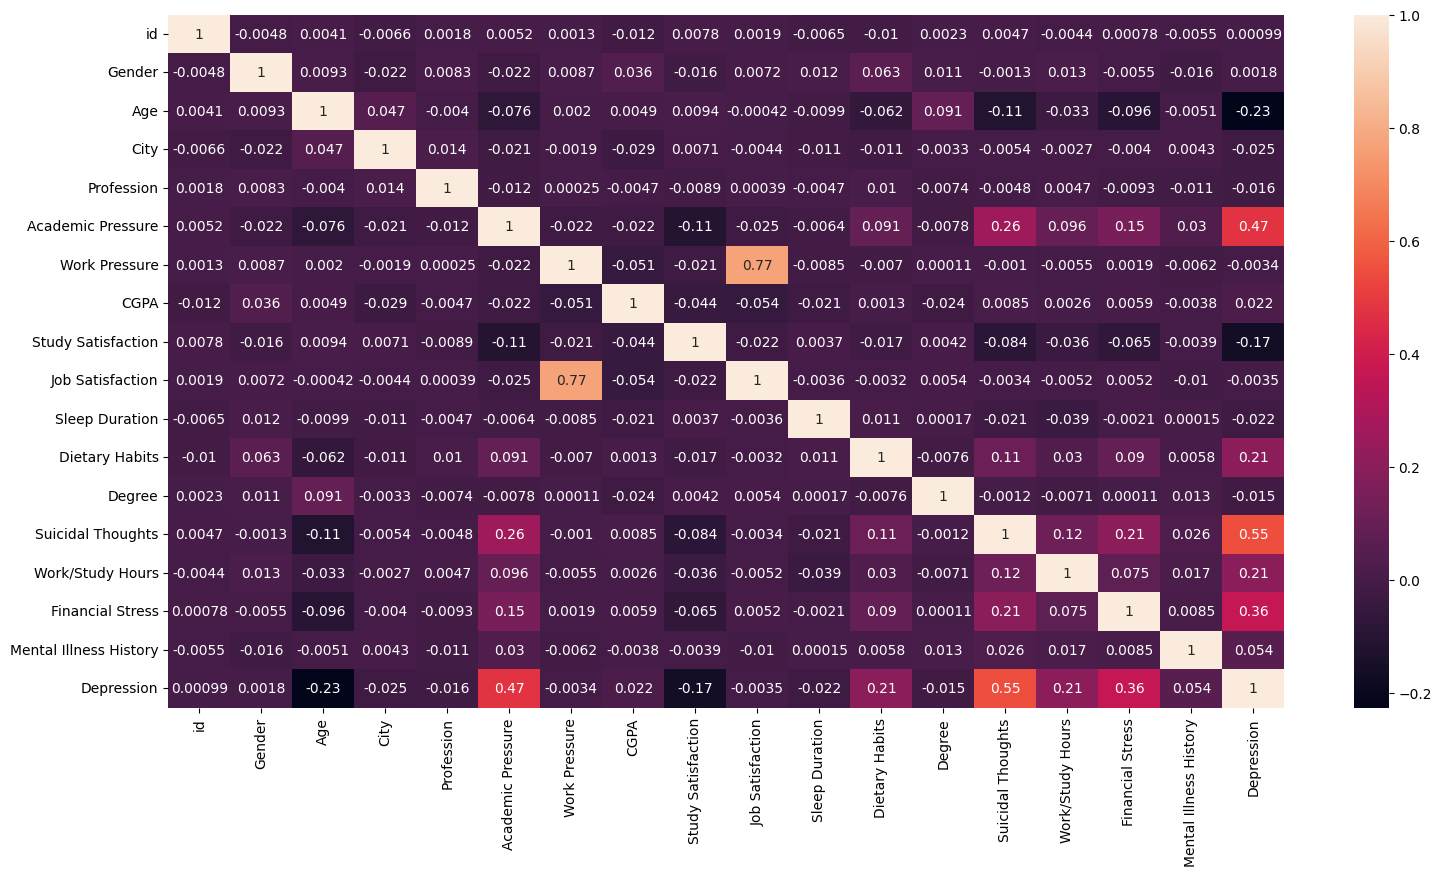

In [48]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(), annot=True)

In [49]:
data.drop(['id', 'Work Pressure'], axis=1, inplace=True)

In [50]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Mental Illness History,Depression
0,1,33.0,51,11,5.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,11,2.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,11,3.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,11,3.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,11,4.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [51]:
# divide the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Depression', axis=1), data['Depression'], test_size=0.25, random_state=45)

In [52]:
# Import the algorithm and train the model
# We use Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
y_pred = model.predict(X_test)

In [54]:
# import the performance matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2944
           1       0.86      0.88      0.87      4031

    accuracy                           0.85      6975
   macro avg       0.85      0.84      0.84      6975
weighted avg       0.85      0.85      0.85      6975



In [55]:
# import all models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [56]:
model = {
    'logistic': LogisticRegression(),
    'naive': GaussianNB(),
    'Random': RandomForestClassifier(),
    'Gradient': GradientBoostingClassifier()
}

In [57]:
# grid Searching
from sklearn.model_selection import GridSearchCV
grid = {
    'logistic': {
        'C': [10, 20, 50, 100, 150, 80]
    },
    'naive': {
        'var_smoothing': [1e-9, 1e-20, 1e-30]
    },
    'Random': {
        'n_estimators': [50, 100, 150],
        'max_depth': [1,2,3,4,5,6,7]
    },
    'Gradient': {
        'n_estimators': [50, 100, 150],
        'max_depth': [1,2,3,4,5,6,7],
        'learning_rate': [0.1, 0.01, 0.001]
    }
}

In [58]:
for model_name, model in model.items():
    gr = GridSearchCV(model, grid[model_name], cv=5, scoring='accuracy')
    gr.fit(X_train, Y_train)
    print(f'The {model_name} is the best model with a score of {gr.best_score_}')

c:\Users\Dunith Munasinghe\Desktop\Group_07_ML_Assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dunith Munasinghe\Desktop\Group_07_ML_Assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

The logistic is the best model with a score of 0.8465327549223189
The naive is the best model with a score of 0.8383120426909361
The Random is the best model with a score of 0.8381688905336595
The Gradient is the best model with a score of 0.847536327729691


In [59]:
# we can identify that the GradientBoostingClassifier is the best model with best accuracy
best_model = GradientBoostingClassifier(n_estimators=150, max_depth=2, learning_rate=0.1)

In [60]:
best_model.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [61]:
ypre = best_model.predict(X_test)

In [62]:
print(classification_report(Y_test, ypre))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2944
           1       0.86      0.89      0.87      4031

    accuracy                           0.85      6975
   macro avg       0.85      0.84      0.85      6975
weighted avg       0.85      0.85      0.85      6975



In [63]:
import joblib
joblib.dump( best_model, open('model.pkl', 'wb'))